# [ASNARO-1 の波長合成画像を取得する](https://www.tellusxdp.com/ja/howtouse/dev/20200220_000178.html)

In [1]:
import os
import json

fpth_secret = os.path.join(os.environ['HOME'], 'working/jupyter/secret.json')
with open(fpth_secret) as f:
    secret = json.load(f)
TOKEN = secret['tellus']
HEADERS = {
    'Authorization': 'Bearer ' + TOKEN
}

## ASNARO-1 の波長合成画像を API を利用して取得する

In [2]:
import requests

def fetch_asnaro_scenes(world_pos):
    url = 'https://gisapi.tellusxdp.com'
    url += '/api/v1/asnaro1/scene'
    
    r = requests.get(url, params=world_pos, headers=HEADERS)
    
    return r.json()

In [3]:
pos = {
    'min_lat': 20.425278,
    'min_lon': 122.933611,
    'max_lat': 45.557222,
    'max_lon': 153.986389
}
scenes = fetch_asnaro_scenes(pos)
scene = scenes[7]
print(scene)

{'acquisitionDate': 'Tue, 20 Nov 2018 12:57:17 GMT', 'clat': 30.408534864078, 'clon': 130.937097208647, 'cloudCover': 0.0, 'entityId': '20181223092559244_AS1', 'max_lat': 30.457394006008, 'max_lon': 131.036106067389, 'min_lat': 30.3596073227358, 'min_lon': 130.838178116022, 'path': 0, 'productId': '20181223092559244_AS1_D01_L1B', 'row': 0, 'thumbs_url': 'https://tile.tellusxdp.com/thums/ASNARO-1/20181223092559244_AS1.PNG'}


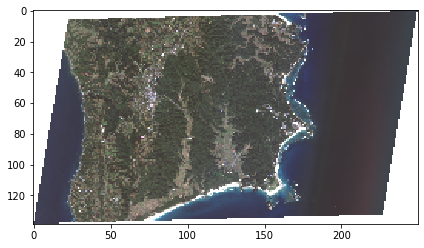

In [4]:
from skimage import io
%matplotlib inline

img_thumbs = io.imread(scene['thumbs_url'])
io.imshow(img_thumbs)

In [5]:
import math

def deg2num(lat_deg, lon_deg, zoom):
    # https://wiki.openstreetmap.org/wiki/Slippy_map_tilenames#Python
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    lat_rad = math.radians(lat_deg)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)

print(deg2num(scene['clat'], scene['clon'], 16))

(56604, 26952)


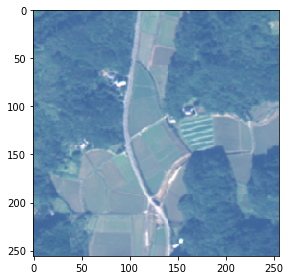

In [6]:
from io import BytesIO

def fetch_asnaro1_image(productid, tile, color):
    url = 'https://gisapi.tellusxdp.com'
    dct = {'productid': productid}
    dct.update(tile)
    url += '/blend/asnaro1/{productid}/{z}/{x}/{y}.png'.format(**dct)
    
    r = requests.get(url, params=color, headers=HEADERS)
    
    return io.imread(BytesIO(r.content))

tile = {
    'x': 56604,
    'y': 26952,
    'z': 16
}
color = {
    'preset': 'true'
}
img = fetch_asnaro1_image(scene['productId'], tile, color)
io.imshow(img)

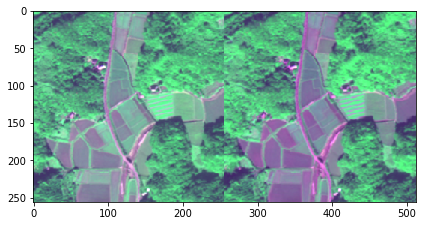

In [7]:
import numpy as np

color = {
    'preset': 'natural'
}
img_natural = fetch_asnaro1_image(scene['productId'], tile, color)

color = {
    'r': 4,
    'g': 6,
    'b': 3,
}
img_handmade = fetch_asnaro1_image(scene['productId'], tile, color)

io.imshow(np.hstack((img_natural, img_handmade)))

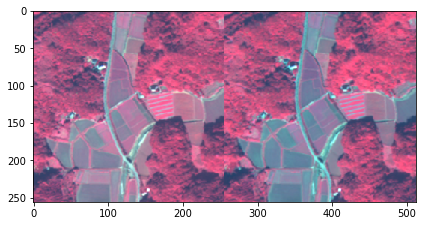

In [8]:
color = {
    'preset': 'false'
}
img_false = fetch_asnaro1_image(scene['productId'], tile, color)

color = {
    'r': 6,
    'g': 4,
    'b': 3,
}
img_handmade = fetch_asnaro1_image(scene['productId'], tile, color)
io.imshow(np.hstack((img_false, img_handmade)))